In [23]:
import numpy as np
import matplotlib.pyplot as plt
import odl
from odl.contrib import tomo

space = odl.uniform_discr([-112,-112,0],[112,112,224], 128)

geo = tomo.elekta_icon_geometry(num_angles=128)

# load data

y_n = np.load("noisy_sinogram.npy")


A = odl.tomo.operators.ray_trafo.RayTransform(space, geo, impl='astra_cuda')

In [24]:
recover =  tomo.elekta_icon_fbp(A)

In [25]:
x = recover(y_n)

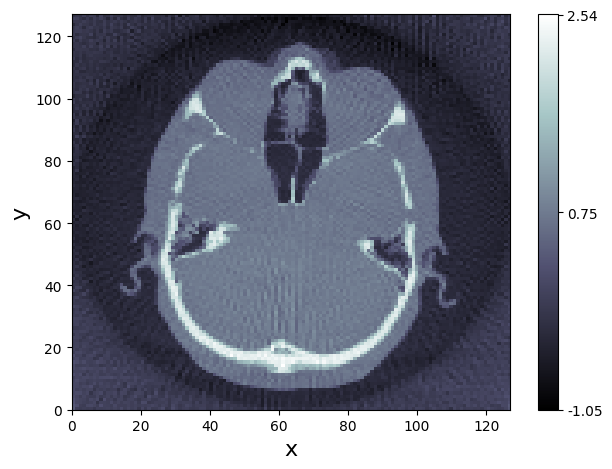

<Figure size 640x480 with 0 Axes>

Suppressor


In [26]:
x[:,:,30].show()
print("Suppressor")

In [27]:
def solve(y,freq, filter_type):
    recover =  tomo.elekta_icon_fbp(A,padding=False, filter_type=filter_type, frequency_scaling=freq)
    return recover(y)



Current filter is Ram-Lak


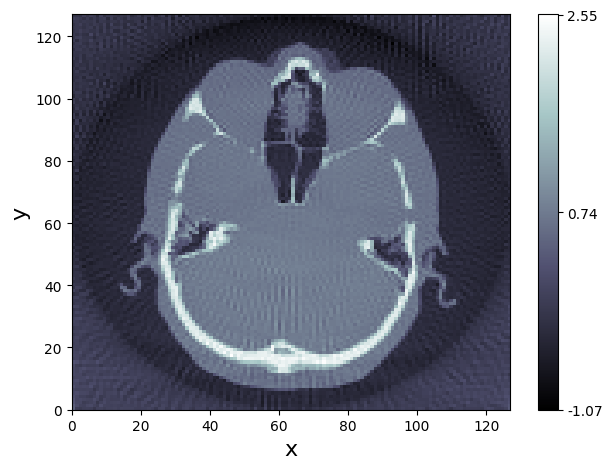

<Figure size 640x480 with 0 Axes>

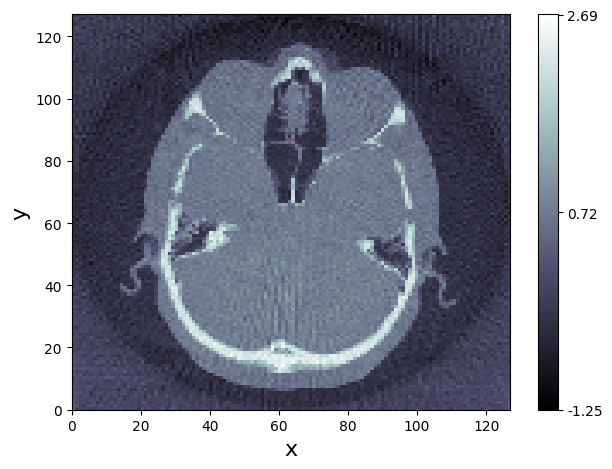

<Figure size 640x480 with 0 Axes>

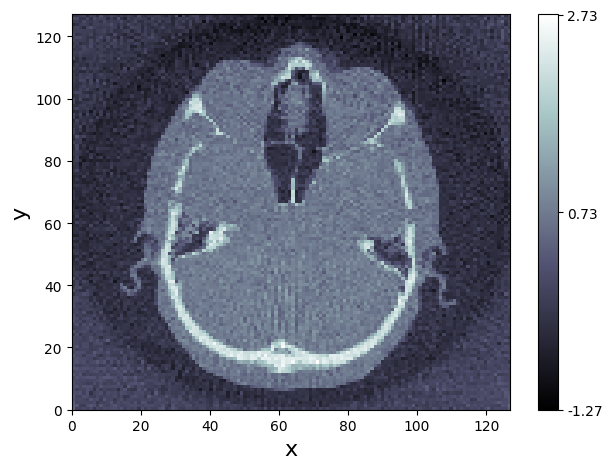

<Figure size 640x480 with 0 Axes>

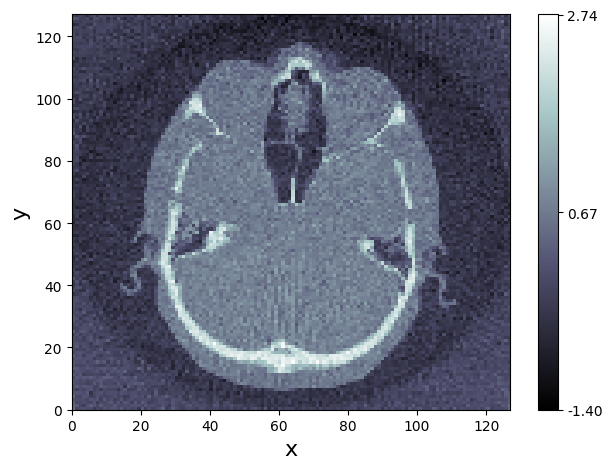

<Figure size 640x480 with 0 Axes>

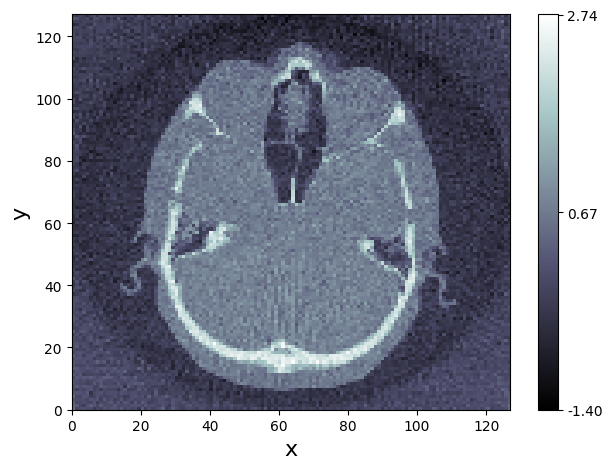

<Figure size 640x480 with 0 Axes>

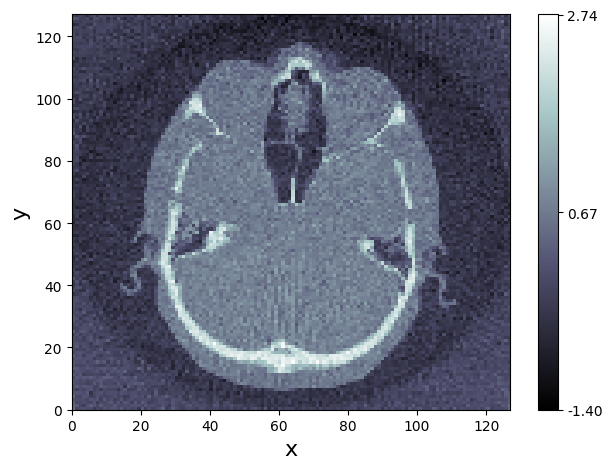

<Figure size 640x480 with 0 Axes>

Current filter is Shepp-Logan


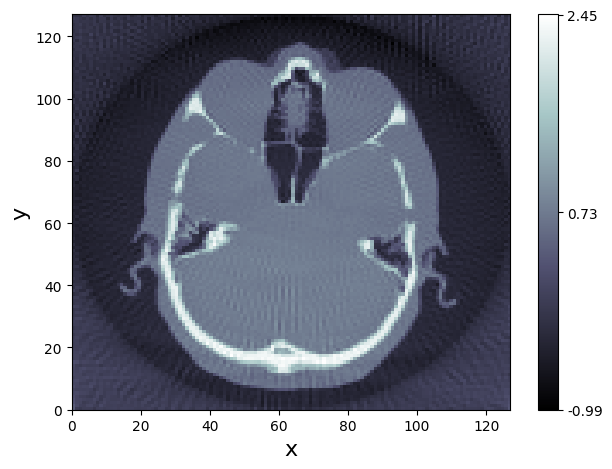

<Figure size 640x480 with 0 Axes>

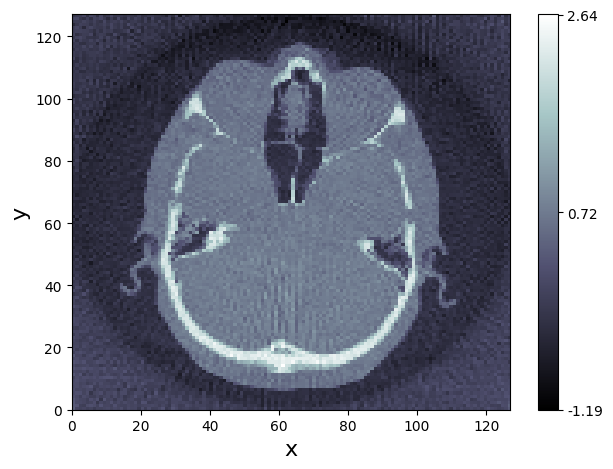

<Figure size 640x480 with 0 Axes>

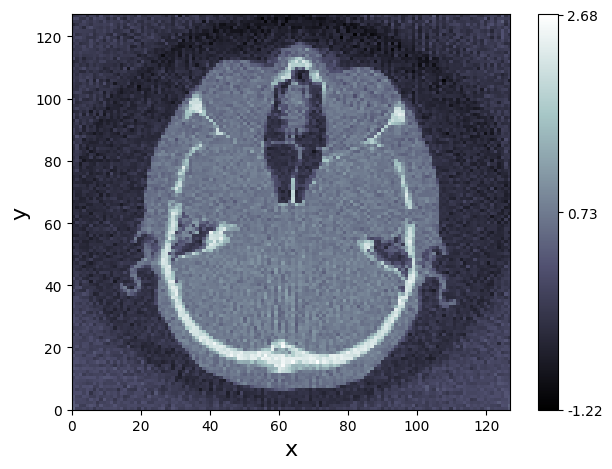

<Figure size 640x480 with 0 Axes>

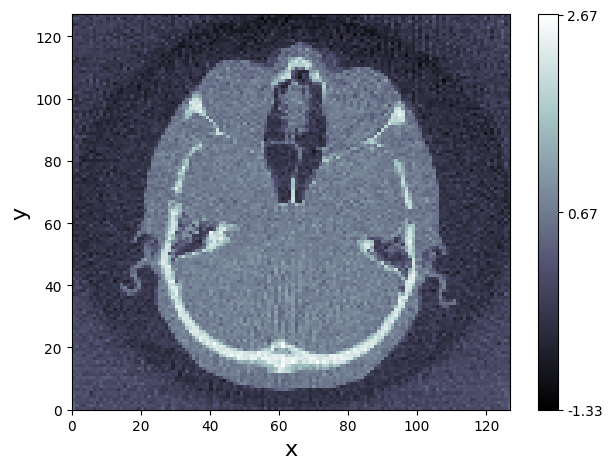

<Figure size 640x480 with 0 Axes>

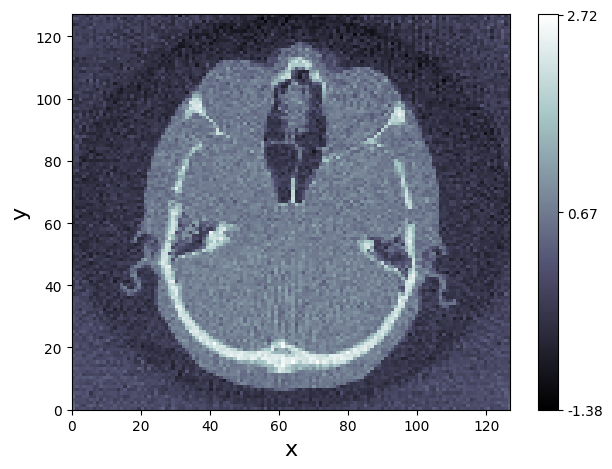

<Figure size 640x480 with 0 Axes>

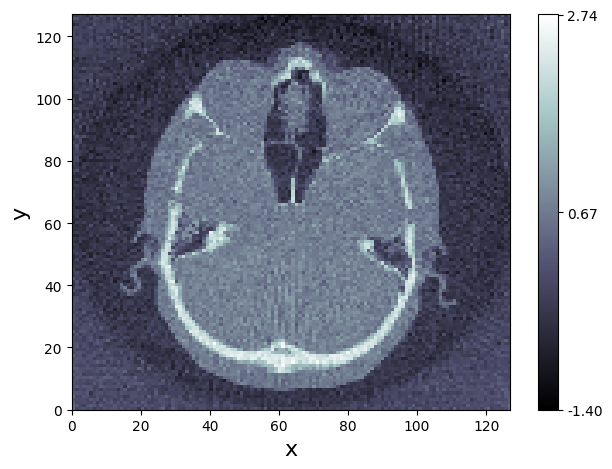

<Figure size 640x480 with 0 Axes>

Current filter is Cosine


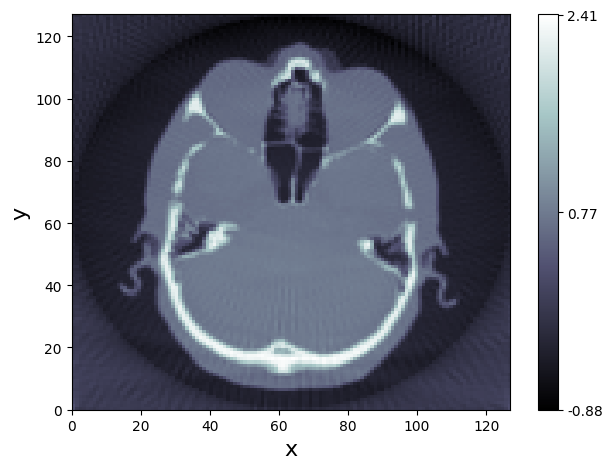

<Figure size 640x480 with 0 Axes>

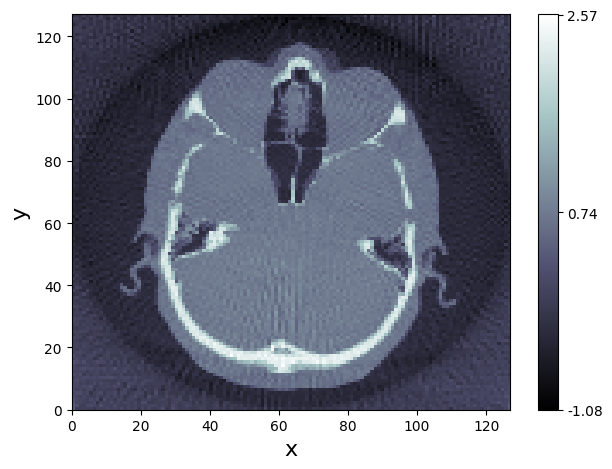

<Figure size 640x480 with 0 Axes>

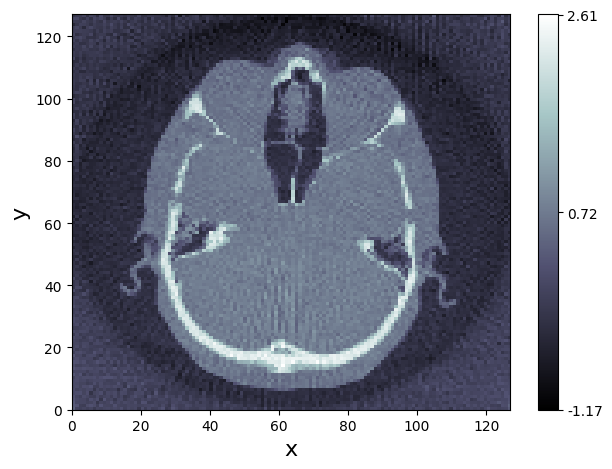

<Figure size 640x480 with 0 Axes>

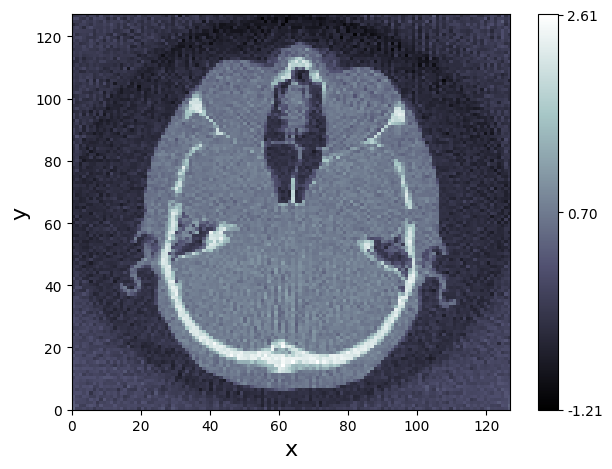

<Figure size 640x480 with 0 Axes>

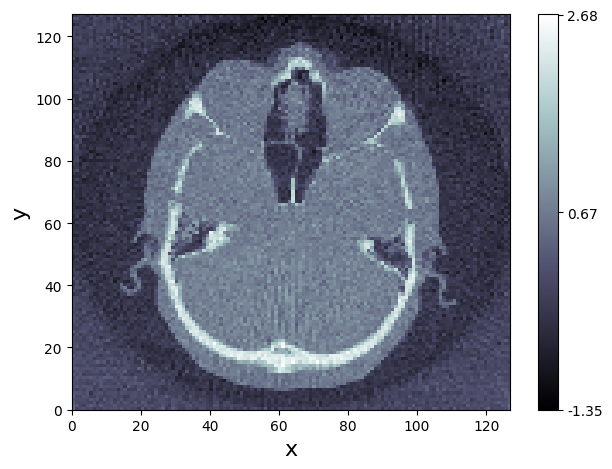

<Figure size 640x480 with 0 Axes>

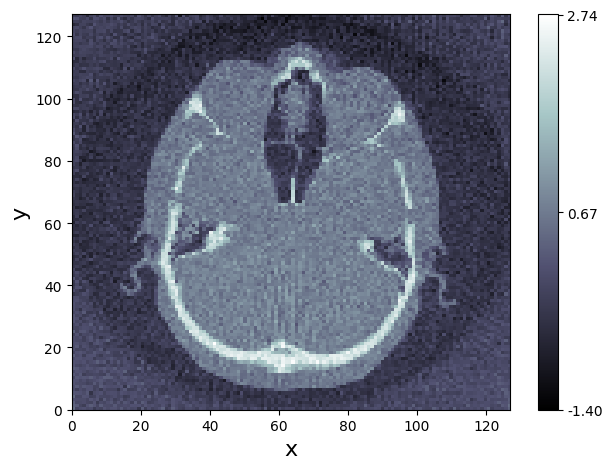

<Figure size 640x480 with 0 Axes>

Current filter is Hamming


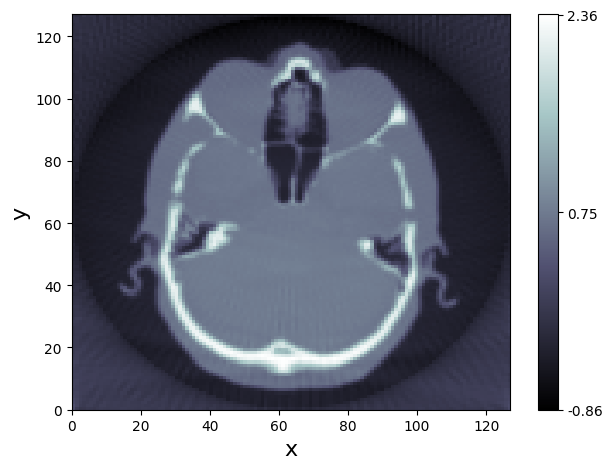

<Figure size 640x480 with 0 Axes>

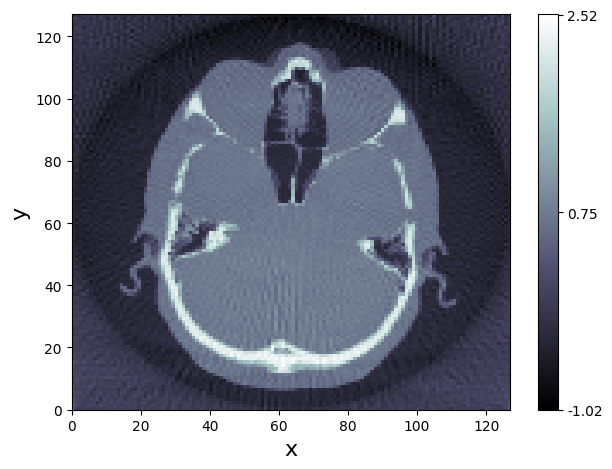

<Figure size 640x480 with 0 Axes>

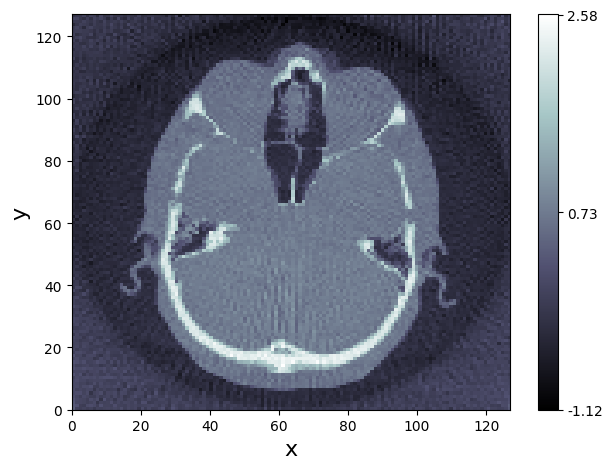

<Figure size 640x480 with 0 Axes>

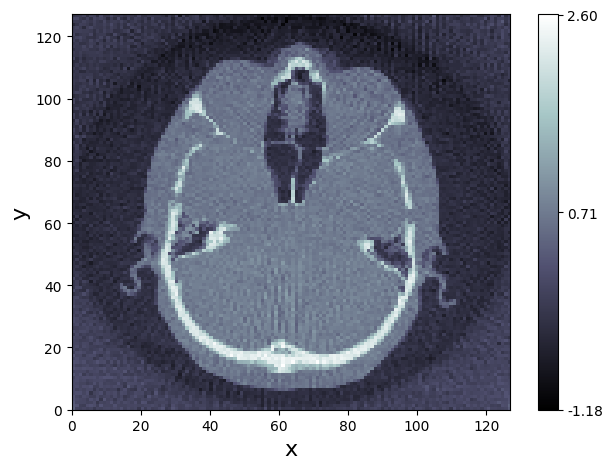

<Figure size 640x480 with 0 Axes>

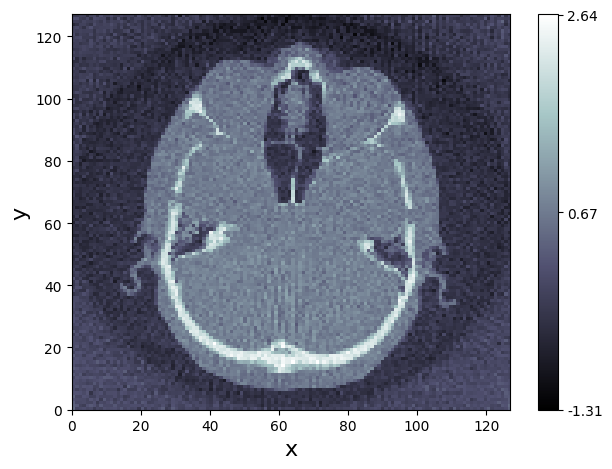

<Figure size 640x480 with 0 Axes>

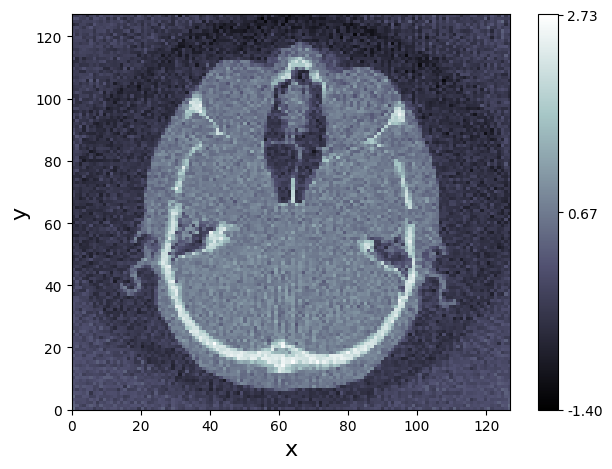

<Figure size 640x480 with 0 Axes>

Current filter is Hann


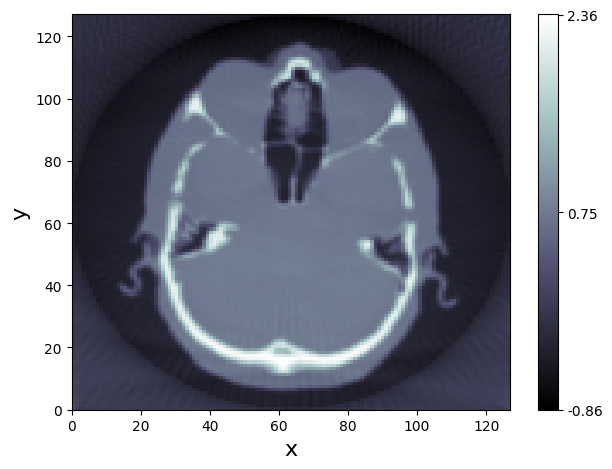

<Figure size 640x480 with 0 Axes>

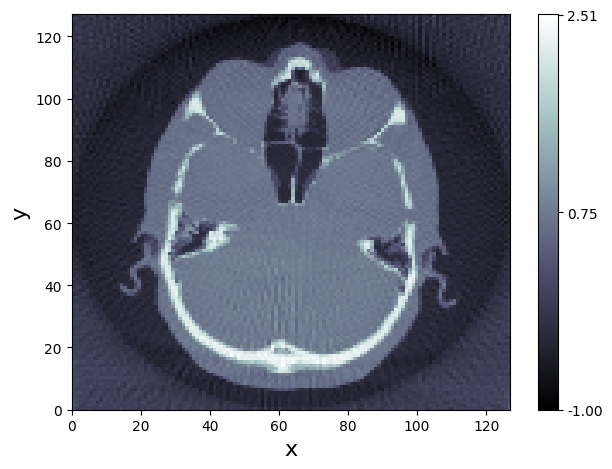

<Figure size 640x480 with 0 Axes>

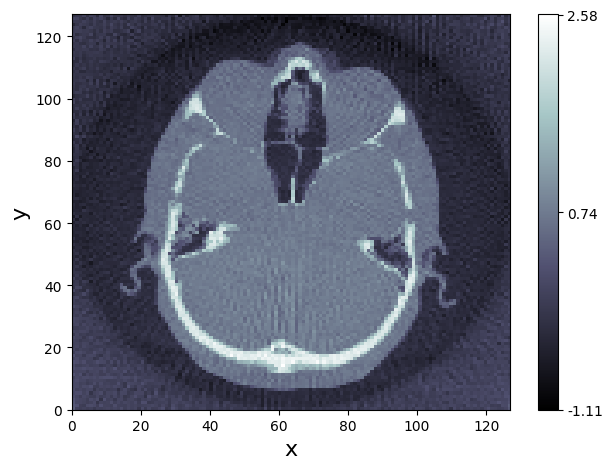

<Figure size 640x480 with 0 Axes>

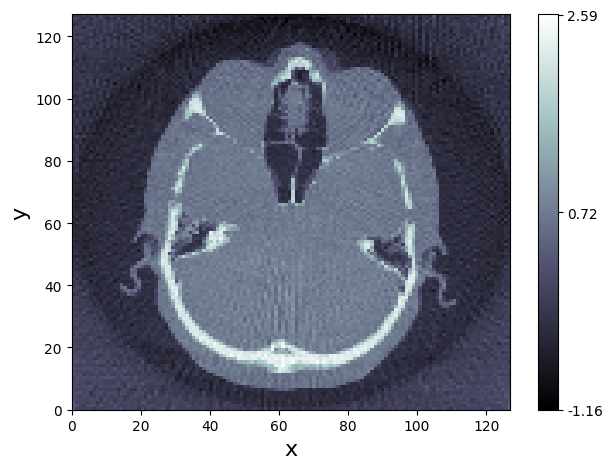

<Figure size 640x480 with 0 Axes>

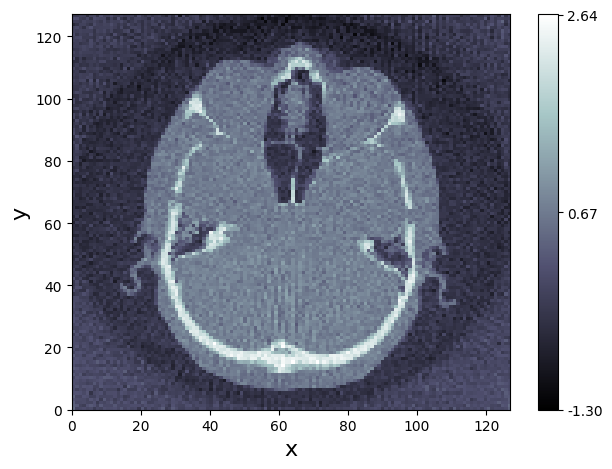

<Figure size 640x480 with 0 Axes>

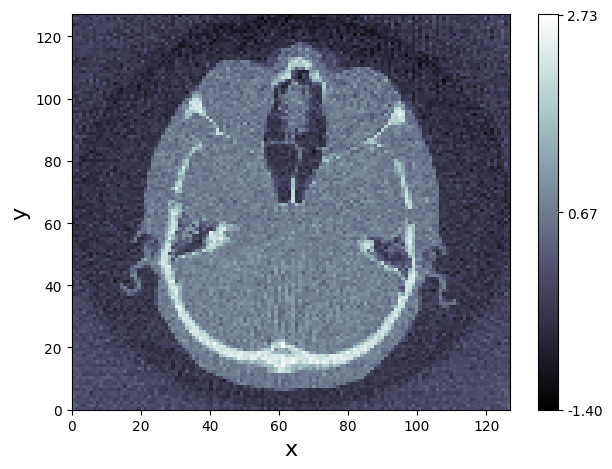

<Figure size 640x480 with 0 Axes>

Done!!


In [30]:
filters = ['Ram-Lak', 'Shepp-Logan', 'Cosine', 'Hamming', 'Hann']
freqs = [0.2,0.5,0.8,1.0,2.0,10.0]

for filter in filters:
    print("Current filter is "+filter)
    for f in freqs:
        x = solve(y_n,f,filter)
        fig = x[:,:,30].show()

        filename = "slice30_"+filter+"_"+str(f)+".png"
        fig.savefig(filename)

print("Done!!")